### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

In [1]:
# 데이터파일 등록
import pandas as pd

path = "./datasets/customer_shopping_data.csv"
cs_df = pd.read_csv(path)

In [2]:
# 데이터 확인
display(cs_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
# 데이터 feature 정보 확인 
cs_df.info()

# 결측치 데이터 확인 (없음)
cs_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [4]:
# 원본 데이터가 아닌 필요데이터 저장
cs_need_df = cs_df 
cs_need_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
# 중복행 확인 (없음)
cs_need_df.duplicated().sum()

0

In [6]:
# 고객직업에 따른 이상값이 있는지 확인

display(cs_need_df['customer_id'].astype(str).str[0].value_counts())
display(cs_need_df['invoice_no'].astype(str).str[0].value_counts())

customer_id
C    99457
Name: count, dtype: int64

invoice_no
I    99457
Name: count, dtype: int64

In [7]:
# 날짜, 금액, 개수 최대 최소 값 확인 (음수 값 유무 확인)
cs_need_df.columns
cs_need_df.describe().T

# 날짜 일반 객체에서 datatime 으로 변환
cs_need_df['invoice_date'] = pd.to_datetime(cs_need_df['invoice_date'], format='%d/%m/%Y')
display(cs_need_df)

# 날짜 데이터 타입 변경 후 최대, 최소 날짜 확인
cs_need_df.describe().T

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


,count,mean,min,25%,50%,75%,max,std
age,99457.0,43.427089,18.0,30.0,43.0,56.0,69.0,14.990054
quantity,99457.0,3.003429,1.0,2.0,3.0,4.0,5.0,1.413025
price,99457.0,689.256321,5.23,45.45,203.3,1200.32,5250.0,941.184567
invoice_date,99457,2022-02-04 02:46:59.783424,2021-01-01 00:00:00,2021-07-19 00:00:00,2022-02-05 00:00:00,2022-08-22 00:00:00,2023-03-08 00:00:00,NaN


In [8]:
# RFM 데이터 확인을 위한 내용 확인
# R : Recency

InvoiceDate_max = cs_need_df['invoice_date'].max()
cs_need_df['Recency'] = (pd.to_datetime(InvoiceDate_max) - cs_need_df['invoice_date']).dt.days
cs_rfm_r = cs_need_df
cs_rfm_r

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,215
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,451
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,484
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,661
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,500
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,168
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,532
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,710
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,722


In [9]:
# F: Frequency : 자주 구매 값이 전부 1 이기 떄문에 구매 수량으로 대체

rf_df = cs_rfm_r.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('quantity', 'sum'))
rf_df



,Recency,Frequency
customer_id,,
C100004,467,5
C100005,5,2
C100006,97,3
C100012,570,5
C100019,591,1
...,...,...
C999886,0,3
C999910,123,3
C999974,302,5


In [10]:
# Monetary : 금액
m_df = cs_need_df.copy()
m_df.loc[:, 'Monetary'] = m_df['quantity'] * m_df['price']

m_df = m_df.groupby('customer_id')[['Monetary']].sum()
m_df

,Monetary
customer_id,
C100004,7502.00
C100005,2400.68
C100006,322.56
C100012,130.75
C100019,35.84
...,...
C999886,47.07
C999910,136.35
C999974,7502.00


In [11]:
# RFM 점수를 합하기 위해 인덱스 번호 생성
rf_df.reset_index()
m_df.reset_index()
rfm_df = rf_df.merge(m_df, on='customer_id')
rfm_df = rfm_df.reset_index()

In [12]:
# rfm 데이터 프레임에 정규화 식 적용
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
rfm_df[['Recency', 'Frequency', 'Monetary']]= scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])
rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,0.586683,1.00,0.285648
1,C100005,0.006281,0.25,0.091273
2,C100006,0.121859,0.50,0.012091
3,C100012,0.716080,1.00,0.004783
4,C100019,0.742462,0.00,0.001166
...,...,...,...,...
99452,C999886,0.000000,0.50,0.001594
99453,C999910,0.154523,0.50,0.004996
99454,C999974,0.379397,1.00,0.285648
99455,C999976,0.327889,0.50,0.012091


In [13]:
# 최근 날짜가 가장 점수가 높기 때문에 1을 뺀 값 대입
rfm_df['Recency'] = 1 - rfm_df['Recency']

In [14]:
# RFM TotalCount 합산
rfm_df['RFMScore'] = rfm_df[['Recency', 'Frequency','Monetary']].sum(axis=1)
rfm_df

,customer_id,Recency,Frequency,Monetary,RFMScore
0,C100004,0.413317,1.00,0.285648,1.698965
1,C100005,0.993719,0.25,0.091273,1.334992
2,C100006,0.878141,0.50,0.012091,1.390232
3,C100012,0.283920,1.00,0.004783,1.288702
4,C100019,0.257538,0.00,0.001166,0.258704
...,...,...,...,...,...
99452,C999886,1.000000,0.50,0.001594,1.501594
99453,C999910,0.845477,0.50,0.004996,1.350473
99454,C999974,0.620603,1.00,0.285648,1.906251
99455,C999976,0.672111,0.50,0.012091,1.184202


In [15]:
# RFM 점수에 대하여 필요 데이터 프레임에 합산
cs_need_df = cs_need_df.merge(rfm_df[['customer_id', 'RFMScore']], on='customer_id')
cs_need_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency,RFMScore
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,215,2.015548
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,451,1.139031
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,484,0.403194
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,661,1.741103
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,500,1.130896
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,168,1.799919
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,532,0.582256
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,710,0.358638
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,722,1.482893


In [16]:
# 필요없는 feature 삭제 
cs_need_df=cs_need_df.drop(labels=['quantity', 'price'], axis=1)
cs_need_df

,invoice_no,customer_id,gender,age,category,payment_method,invoice_date,shopping_mall,Recency,RFMScore
0,I138884,C241288,Female,28,Clothing,Credit Card,2022-08-05,Kanyon,215,2.015548
1,I317333,C111565,Male,21,Shoes,Debit Card,2021-12-12,Forum Istanbul,451,1.139031
2,I127801,C266599,Male,20,Clothing,Cash,2021-11-09,Metrocity,484,0.403194
3,I173702,C988172,Female,66,Shoes,Credit Card,2021-05-16,Metropol AVM,661,1.741103
4,I337046,C189076,Female,53,Books,Cash,2021-10-24,Kanyon,500,1.130896
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,Credit Card,2022-09-21,Kanyon,168,1.799919
99453,I325143,C569580,Male,27,Food & Beverage,Cash,2021-09-22,Forum Istanbul,532,0.582256
99454,I824010,C103292,Male,63,Food & Beverage,Debit Card,2021-03-28,Metrocity,710,0.358638
99455,I702964,C800631,Male,56,Technology,Cash,2021-03-16,Istinye Park,722,1.482893


In [17]:
# RFM 점수에 따른 고객별 level 분류
import numpy as np

l1, l2, l3, l4 = np.percentile(cs_need_df['RFMScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.6209409560600792 0.9337272654369081 1.3808011494448058 1.8183114666714846


In [18]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [19]:
cs_need_df['Level'] = cs_need_df['RFMScore'].apply(get_level)
cs_need_df

,invoice_no,customer_id,gender,age,category,payment_method,invoice_date,shopping_mall,Recency,RFMScore,Level
0,I138884,C241288,Female,28,Clothing,Credit Card,2022-08-05,Kanyon,215,2.015548,1
1,I317333,C111565,Male,21,Shoes,Debit Card,2021-12-12,Forum Istanbul,451,1.139031,3
2,I127801,C266599,Male,20,Clothing,Cash,2021-11-09,Metrocity,484,0.403194,5
3,I173702,C988172,Female,66,Shoes,Credit Card,2021-05-16,Metropol AVM,661,1.741103,2
4,I337046,C189076,Female,53,Books,Cash,2021-10-24,Kanyon,500,1.130896,3
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,Credit Card,2022-09-21,Kanyon,168,1.799919,2
99453,I325143,C569580,Male,27,Food & Beverage,Cash,2021-09-22,Forum Istanbul,532,0.582256,5
99454,I824010,C103292,Male,63,Food & Beverage,Debit Card,2021-03-28,Metrocity,710,0.358638,5
99455,I702964,C800631,Male,56,Technology,Cash,2021-03-16,Istinye Park,722,1.482893,2


In [20]:
# level 점수에 따른 등급 치환
cs_need_df['Level'] = cs_need_df['Level'].replace([5, 4, 3, 2, 1],['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
cs_need_df

,invoice_no,customer_id,gender,age,category,payment_method,invoice_date,shopping_mall,Recency,RFMScore,Level
0,I138884,C241288,Female,28,Clothing,Credit Card,2022-08-05,Kanyon,215,2.015548,VIP
1,I317333,C111565,Male,21,Shoes,Debit Card,2021-12-12,Forum Istanbul,451,1.139031,Gold
2,I127801,C266599,Male,20,Clothing,Cash,2021-11-09,Metrocity,484,0.403194,Bronze
3,I173702,C988172,Female,66,Shoes,Credit Card,2021-05-16,Metropol AVM,661,1.741103,Diamond
4,I337046,C189076,Female,53,Books,Cash,2021-10-24,Kanyon,500,1.130896,Gold
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,Credit Card,2022-09-21,Kanyon,168,1.799919,Diamond
99453,I325143,C569580,Male,27,Food & Beverage,Cash,2021-09-22,Forum Istanbul,532,0.582256,Bronze
99454,I824010,C103292,Male,63,Food & Beverage,Debit Card,2021-03-28,Metrocity,710,0.358638,Bronze
99455,I702964,C800631,Male,56,Technology,Cash,2021-03-16,Istinye Park,722,1.482893,Diamond


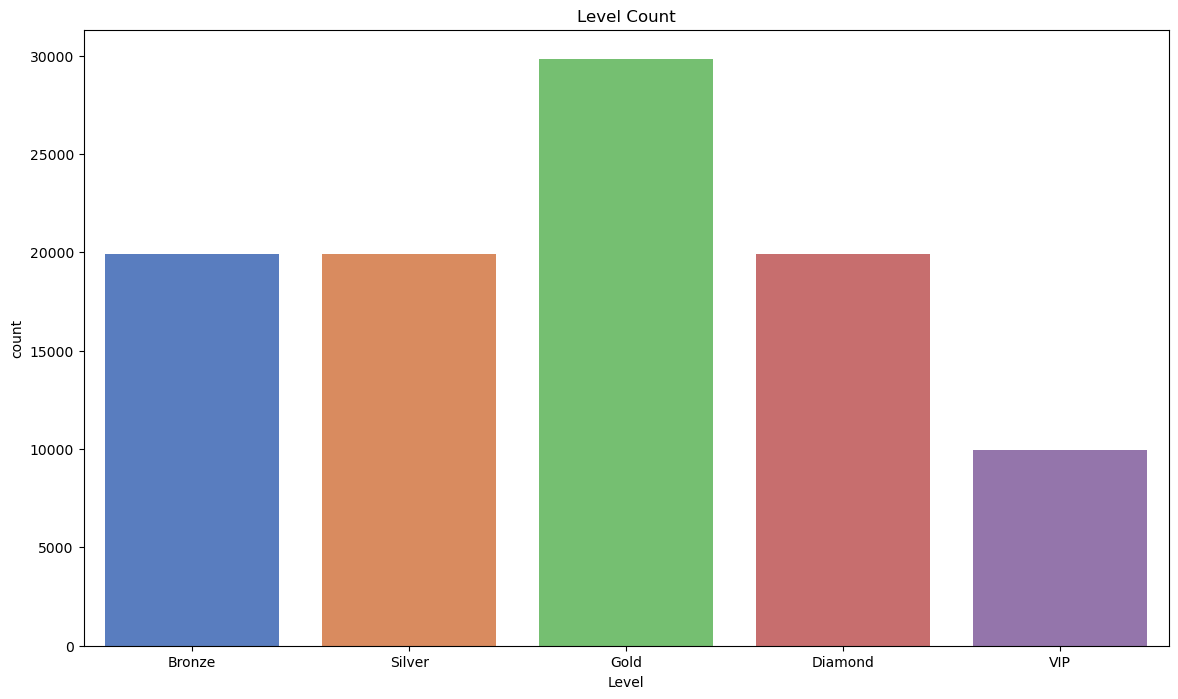

In [21]:
# 데이터 시각화
# 고객 등급에 따른 구매 count 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x ='Level', data=cs_need_df, palette='muted', order=order)
plt.title('Level Count')
plt.show()


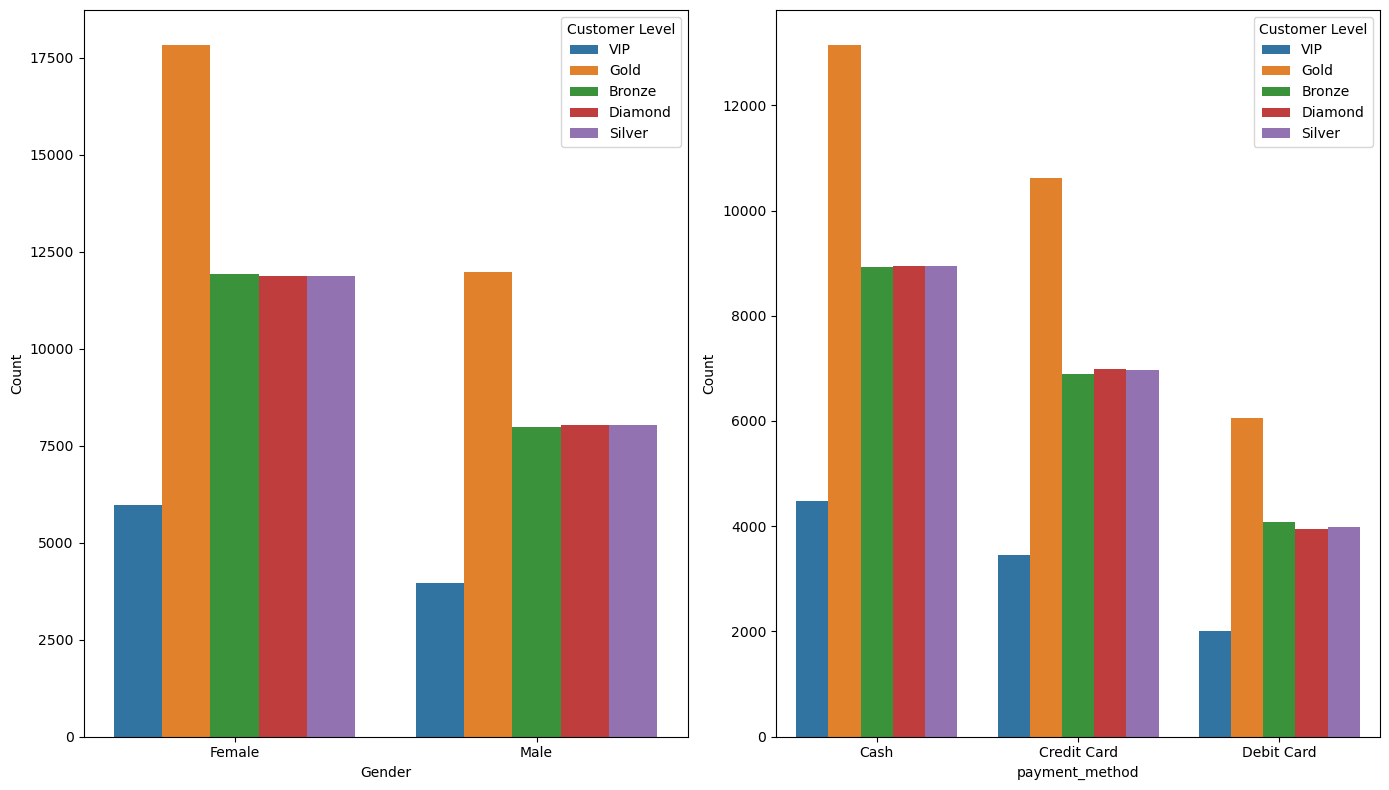

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1) 
sns.countplot(data=cs_need_df, x='gender', hue='Level', order=cs_need_df['gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Customer Level', loc='upper right')


plt.subplot(1, 2, 2)  
sns.countplot(data=cs_need_df, x='payment_method', hue='Level', order=cs_need_df['payment_method'].value_counts().index)
plt.xlabel('payment_method')
plt.ylabel('Count')
plt.legend(title='Customer Level', loc='upper right')

plt.tight_layout()  
plt.show()

<Figure size 1200x1000 with 0 Axes>

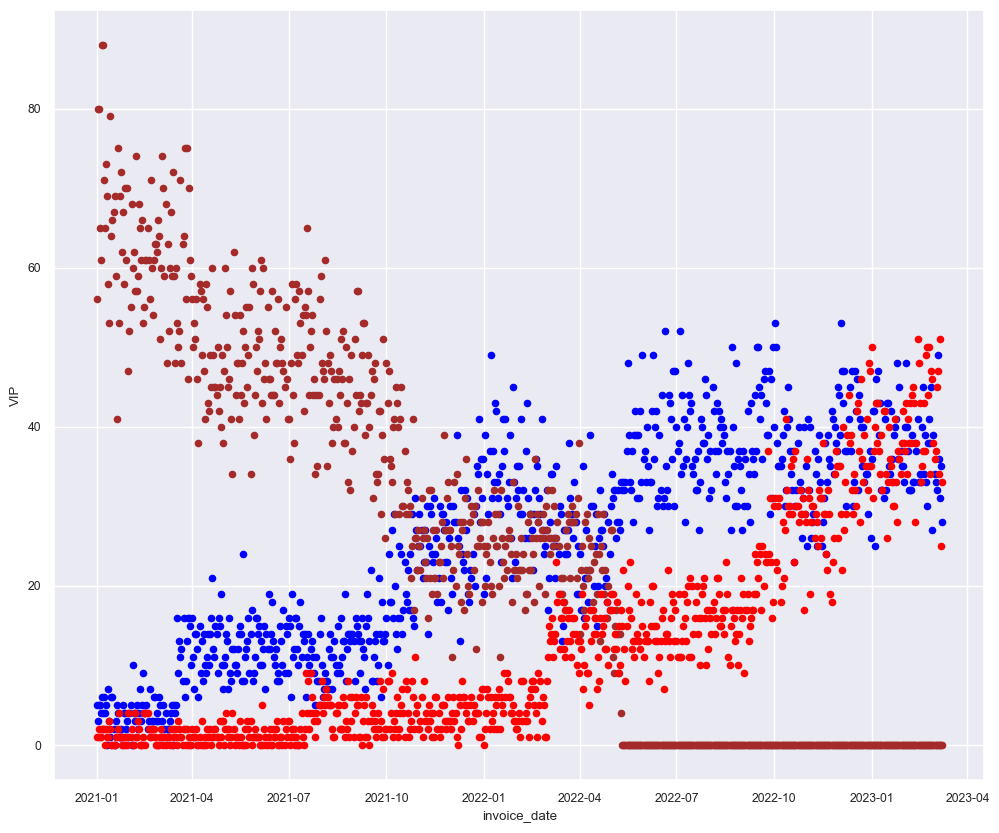

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜와 고객 등급별로 데이터를 그룹화하고 개수를 세어 집계합니다.
date_level_df = cs_need_df.groupby(['invoice_date', 'Level']).size().reset_index(name='Count')

# pivot_table을 사용하여 데이터를 재구조화합니다.
pivot_df = date_level_df.pivot_table(index='invoice_date', columns='Level', values='Count', fill_value=0)
pivot_df = pivot_df.reset_index()

plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
# pivot_df.plot(x='invoice_date', y='Silver', kind='scatter', ax=axes, c='orange')
# pivot_df.plot(x='invoice_date', y='Gold', kind='scatter', ax=axes, c='yellow')
pivot_df.plot(x='invoice_date', y='Diamond', kind='scatter', ax=axes, c='blue')
pivot_df.plot(x='invoice_date', y='Bronze', kind='scatter', ax=axes, c='brown')
pivot_df.plot(x='invoice_date', y='VIP', kind='scatter', ax=axes, c='red')

plt.show()

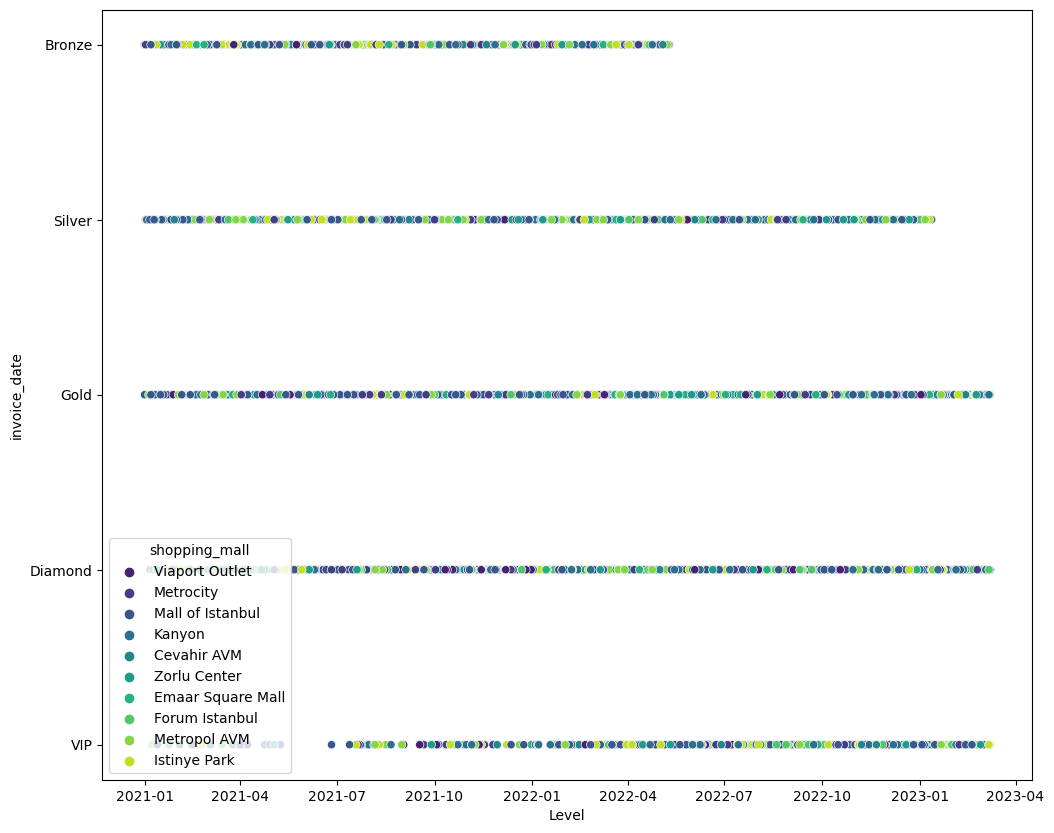

In [24]:
# 랜덤한 고객 10000 명을 추출하여 날짜에 따른 등급별 나라 산포도 작성
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤하게 10000개의 샘플을 선택
sample_df =cs_need_df.sample(n=10000, random_state=1)

columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 'Level' 컬럼을 pd.Categorical 타입으로 변환하면서 순서 지정
sample_df['Level'] = pd.Categorical(sample_df['Level'], categories=columns, ordered=True)

plt.figure(figsize=(12, 10))
sns.scatterplot(data=sample_df, x='invoice_date', y='Level', hue='shopping_mall', palette='viridis')
plt.xlabel('Level')  
plt.ylabel('invoice_date')  
plt.show() 


# 막대그래프 변경


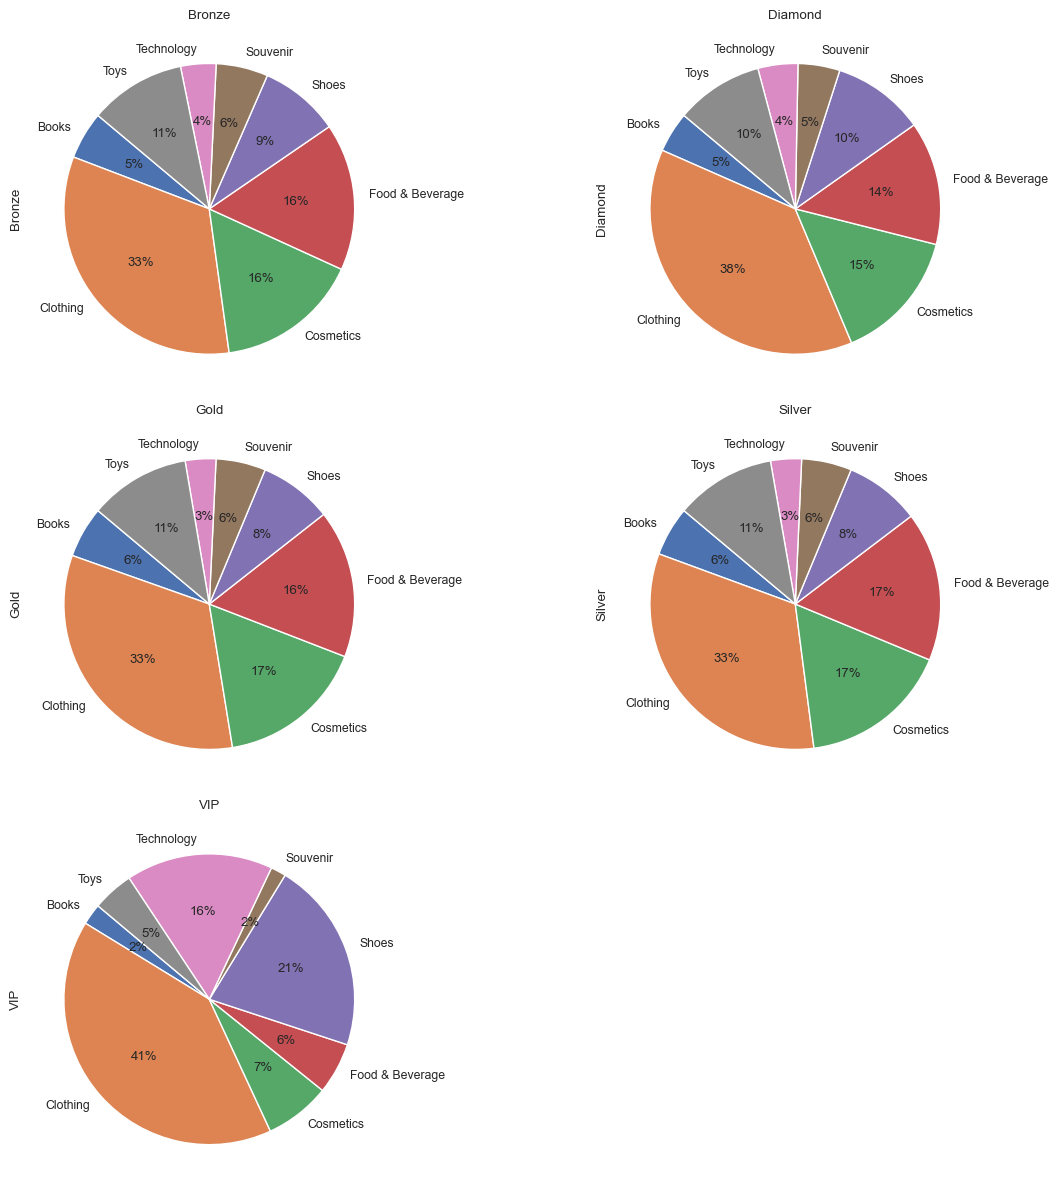

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 폰트 스케일 조정
sns.set(font_scale=0.8)

# 'Level' 및 'category'에 따른 데이터 집계
level_category_counts = cs_need_df.groupby('Level')['category'].value_counts().unstack(fill_value=0)

# 전체 플롯의 행과 열의 수 계산
n_levels = len(level_category_counts)
n_cols = 2
n_rows = n_levels // n_cols + (n_levels % n_cols > 0)

# subplot을 사용하여 파이 차트 배치
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))

for (level, counts), ax in zip(level_category_counts.iterrows(), axes.flatten()):
    counts.plot(kind='pie', autopct='%1.f%%', startangle=140, ax=ax)
    ax.set_title(f'{level}')

# 남은 서브플롯 비활성화
for i in range(n_levels, n_rows*n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


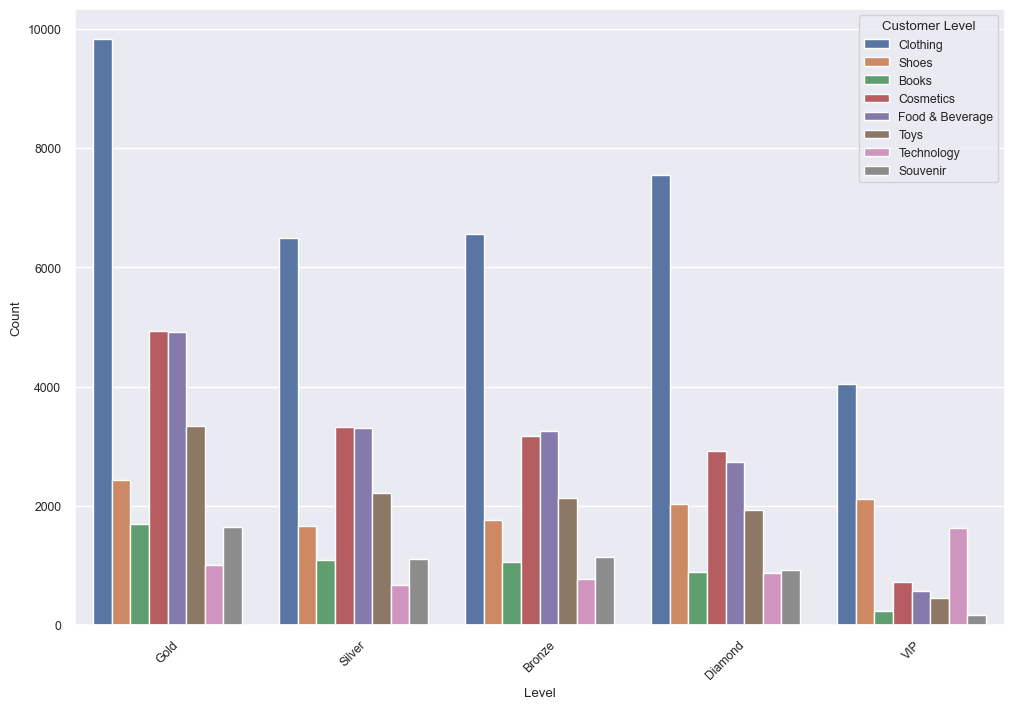

In [26]:
# 쇼핑몰 구매고객 등급에 따른 쇼핑몰 개수 확인

plt.figure(figsize=(12, 8))


sns.countplot(data=cs_need_df, x='Level', hue='category', order=cs_need_df['Level'].value_counts().index)
plt.xlabel('Level')
plt.ylabel('Count')
plt.legend(title='Customer Level', loc='upper right')
plt.xticks(rotation=45)
plt.show()

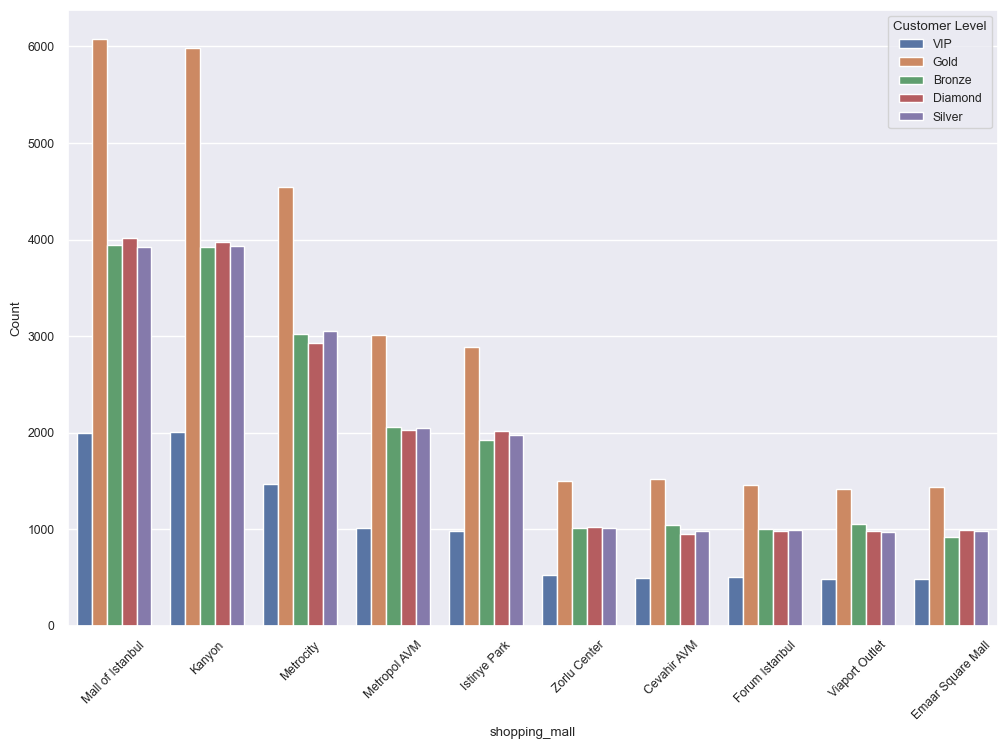

In [27]:
# 쇼핑몰 구매고객 등급에 따른 쇼핑몰 개수 확인

plt.figure(figsize=(12, 8))


sns.countplot(data=cs_need_df, x='shopping_mall', hue='Level', order=cs_need_df['shopping_mall'].value_counts().index)
plt.xlabel('shopping_mall')
plt.ylabel('Count')
plt.legend(title='Customer Level', loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### 마케팅 전략

## 1. 날짜별 마케팅
  
시간별 구매 등급 count 분포를 봤을 때 2022년 상반기를 기점으로 vip 고객 계층에서 구매율이 높아지는 증상을 보이고 있습니다.  
또한 Bronze를 제외한 나른 등급에서는 일정한 기한을 기점으로 증감이 반복되는 패턴을 보이지만 전반적으로 소비Count 가 증가되는 증상을 볼 수 있습니다.

따라서 현재는 구매 등급이 높은 고객의 소비 패턴을 봤을 때 자주 구매하는 Technology 제품의 종류의 다양화 또는 수량을 증대하여 마케팅 전략을 펼쳐야 할 것으로 사료됩니다.  
  
또한 전반적인 level에서 높은 구매율을 보이고 있는 옷과 신발에 대한 마케팅도 시기별 상반기 하반기를 공략하여 상반기와 하반기 시작을 공략하여 급진적인 마케팅 전략이 아닌 충분한 전략 파악 후 하반기 프로모션을 진행해도 될것으로 사료됩니다.  
  

## 2. 성별 마케팅
  
전반적인 구매등급에서 여성이 남성보다 약 1.5 배 이상 높은것으로 확인되었습니다.  

따라서 남성고객을 위한 마케팅보다는 여성을 위한 마케팅을 우선적으로 적용할 것을 권장드리며, 구매 방법을 봤을때 cash 항목이 높은 것으로 보아 방문 구매율이 높은 것으로 확인됩니다.  

따라서 여성 고객을 유치할 수 있는 다양한 문화센터 또는 시설 복지에 관한 서비스도 추가하여 여성의 방문 확률을 높여 구매 빈도를 증가시킬 수 있는 방법이 있습니다. 

## 3. 지역 타켓 마케팅
  
현재 이스탄불 쇼핑몰에서는 튀르키에 수도와 가장 가까운 접근성을 가지고 있으며 그 다음 kanyon 쇼핑몰의 경우 이스탄불 관광지와 가까운 접근성을 가지고 있는 것으로 확인됩니다.  

쇼핑몰의 경우 지역(접근성)에 따라 판매량에서 차이를 보이고 있으며 보스포루스 해협을 기준으로 좌측의 쇼핑몰들이 조금 더 나은 구매 양상을 보이고 있는 것으로 확인됩니다.   
  
해당 지역을 확인 했을 때 보스포루스 해협을 기준으로 좌측의 경우 관광객도 다수 유입되고 있는 것으로 확인되며   
관광지의 특성을 고려했을 때 지역 주민을 위한 상품 뿐만 아니라 관광객을 위한 상품도 다수 구비해 놓는것이 마케팅에 유리할 수 있습니다.

## 4. 등급별 마케팅
  
현재 전반적인 하위 50% 상위50%를 비교해 보았을 때 상위 50% 이상의 구매 비율이 높은 것으로 확인됩니다.   

vip 도 비율적으로 높은 구매 빈도를 가지고 있으며 gold 이상의 중상위층 구매 고객의 빈도가 높기 때문에  
단순 수익성을 증대시키기 위해서는 옷의 경우꾸준한 마케팅이 유지되어야 하며 신발의 경우 vip 고객을 위한 특정 level을 위한 프로모션 진행,  
화장품의 판매 비율을 높여 수익을 증대시키는 방법이 있습니다.

In [28]:
# > voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합
# customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합
# gender: 고객 성별의 문자a열 변수
# age: 고객 연령의 양의 정수 변수
# category: 구매한 상품 카테고리의 문자열 변수
# quantity: 거래당 각 제품(항목)의 수량
# price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)
# payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수
# invoice_date: 송장 날짜. 거래가 발생한 날
# shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수

,invoice_date,Level,Count
0,2021-01-01,Bronze,56
1,2021-01-01,Diamond,5
2,2021-01-01,Gold,20
3,2021-01-01,Silver,23
4,2021-01-01,VIP,1
...,...,...,...
3554,2023-03-07,Gold,52
3555,2023-03-07,VIP,25
3556,2023-03-08,Diamond,28
3557,2023-03-08,Gold,58


Level,invoice_date,Bronze,Diamond,Gold,Silver,VIP
0,2021-01-01,56.0,5.0,20.0,23.0,1.0
1,2021-01-02,80.0,3.0,38.0,12.0,1.0
2,2021-01-03,80.0,5.0,29.0,21.0,2.0
3,2021-01-04,65.0,5.0,34.0,14.0,1.0
4,2021-01-05,61.0,4.0,31.0,23.0,1.0
...,...,...,...,...,...,...
792,2023-03-04,0.0,49.0,42.0,0.0,47.0
793,2023-03-05,0.0,36.0,52.0,0.0,34.0
794,2023-03-06,0.0,31.0,47.0,0.0,51.0
795,2023-03-07,0.0,35.0,52.0,0.0,25.0


<Axes: xlabel='invoice_date', ylabel='VIP'>

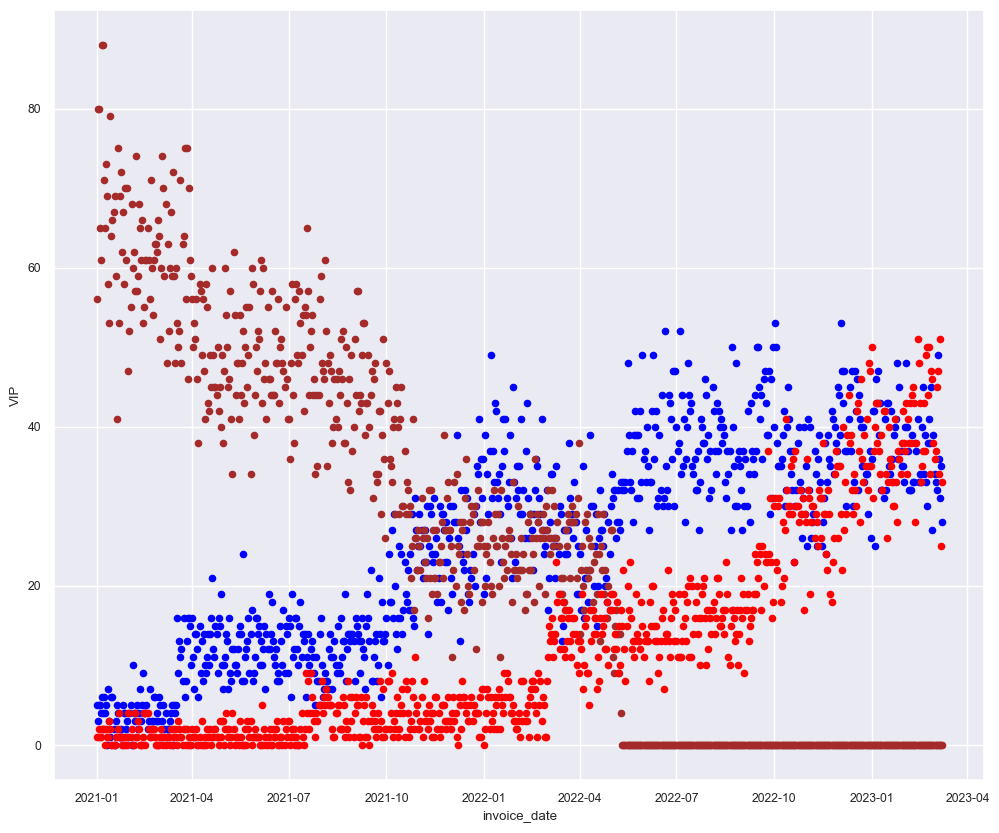

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜와 고객 등급별로 데이터를 그룹화하고 개수를 세어 집계합니다.
date_level_df = cs_need_df.groupby(['invoice_date', 'Level']).size().reset_index(name='Count')
display(date_level_df)

# pivot_table을 사용하여 데이터를 재구조화합니다.
pivot_need_df = date_level_df.pivot_table(index='invoice_date', columns='Level', values='Count', fill_value=0)
pivot_need_df = pivot_need_df.reset_index()
display(pivot_need_df)

# plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
# pivot_df.plot(x='invoice_date', y='Silver', kind='scatter', ax=axes, c='orange')
# pivot_df.plot(x='invoice_date', y='Gold', kind='scatter', ax=axes, c='yellow')
pivot_need_df.plot(x='invoice_date', y='Diamond', kind='scatter', ax=axes, c='blue')
pivot_need_df.plot(x='invoice_date', y='Bronze', kind='scatter', ax=axes, c='brown')
pivot_need_df.plot(x='invoice_date', y='VIP', kind='scatter', ax=axes, c='red')

